<a href="https://colab.research.google.com/github/phandangthoai/Continuous-Wavelet-Transform-in-Acoustic-Recognition-Using-Hop-Size/blob/main/Reduce_Computational_Complexity_for_Continuous_Wavelet_Transform_in_Acoustic_Recognition_Using_Hop_Size.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install the library for downloading files from internet
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=9978116001325012a3636e425c79d8aabfec3a3699e072b537f0fdbff527881a
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
# Download audio dataset
import wget
url = "https://zenodo.org/records/3384388/files/6_dB_slider.zip?download=1"

In [ ]:
wget.download(url, '/content/6_dB_slider.zip')

In [ ]:
# Extract audios from zip file

# importing required modules
from zipfile import ZipFile

# specifying the zip file name
file_name = "/content/6_dB_slider.zip"

# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

In [ ]:
# This library used for copy and delete files and folders as examples below
import shutil

In [ ]:
src_path = '/content/drive/MyDrive/MIMII_data/6dB/slider/id_00/normal'
dst_path = '/content/6dB/slider/id_00/normal'
shutil.copytree(src_path, dst_path)
print('Copied')

Copied


In [ ]:
src_path = '/content/drive/MyDrive/MIMII_data/6dB/slider/id_00/abnormal'
dst_path = '/content/6dB/slider/id_00/abnormal'
shutil.copytree(src_path, dst_path)
print('Copied')

Copied


In [ ]:
# This code used to count files after copy
import os
directory = '/content/6dB/slider/id_00/normal'
lst = os.listdir(directory) # your directory path
number_files = len(lst)
print(number_files)

In [ ]:
!pip install PyWavelets

In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import pywt

<Figure size 640x480 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

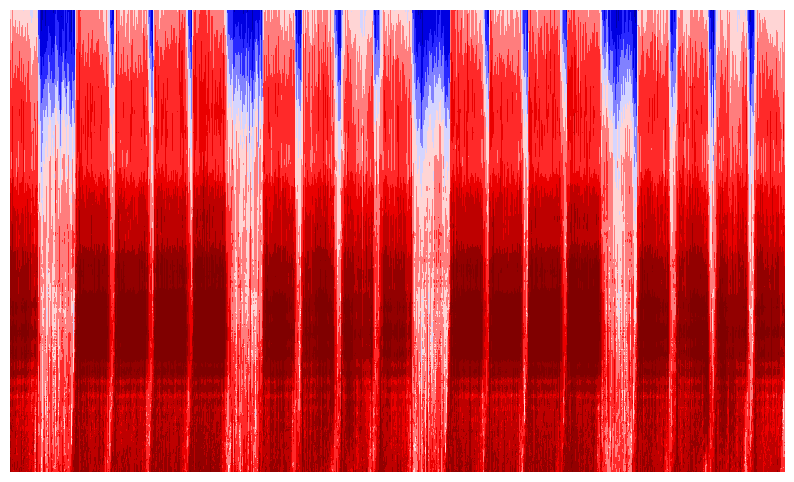

In [ ]:
# Generation scalogram of CWT
dir_path = '/content/6dB/slider/id_00'
scales = np.arange(2, 129)
amp_cof=8
waveletname = 'cmor'
cmap = plt.cm.seismic
contourlevels = np.arange(-6,7)
types = 'normal abnormal'.split()
for g in types:
  pathlib.Path(f'{dir_path}/ScCWT_6dBSlider00_128_amp_8/{g}').mkdir(parents=True, exist_ok=True)
  for filename in os.listdir(f'{dir_path}/{g}'):
      plt.clf()
      sound = f'{dir_path}/{g}/{filename}'
      y, sr = librosa.load(sound, sr=None, mono=True, duration=10)
      y = amp_cof*y/max(abs(y)) #standardize sound
      N = y.shape[0]
      dt=1/sr
      time = np.arange(0, N)
      [coefficients, frequencies] = pywt.cwt(y, scales, waveletname, dt)
      power = (abs(coefficients)) ** 2
      fig, ax = plt.subplots(figsize=(10, 6))
      yticks = np.log2(frequencies)
      im = ax.contourf(time, yticks, np.log2(power), contourlevels, extend='both',cmap=cmap)
      plt.axis('off')
      # below break command used for generation of a single file
      # comment it to generate entire dataset
      break
      plt.savefig(f'{dir_path}/ScCWT_6dBSlider00_128_amp_8/{g}/{filename[:-3].replace(".", "")}.png', bbox_inches='tight')
      plt.close()

<Figure size 640x480 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

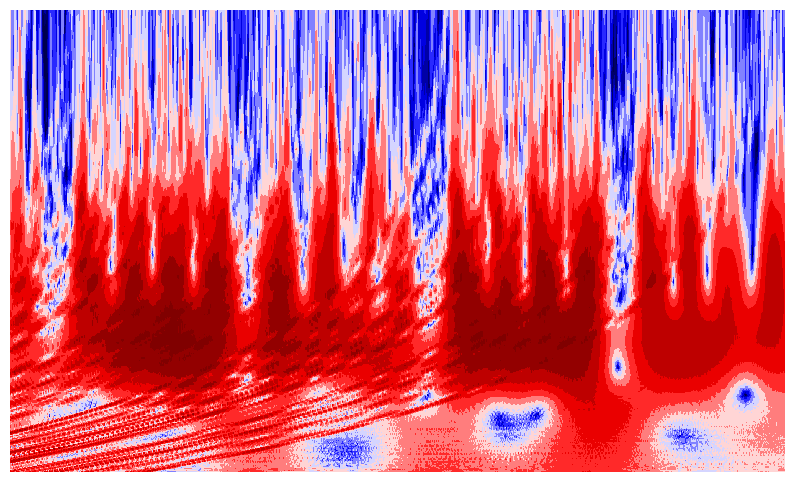

In [ ]:
# Generation scalogram of CWTH
dir_path = '/content/6dB/slider/id_00'
scales = np.arange(2, 129)
step=128
amp_cof=8
waveletname = 'cmor'
cmap = plt.cm.seismic
contourlevels = np.arange(-6,7)
types = 'normal abnormal'.split()
for g in types:
  pathlib.Path(f'{dir_path}/ScCWTH_6dBSlider00_128_amp_20/{g}').mkdir(parents=True, exist_ok=True)
  for filename in os.listdir(f'{dir_path}/{g}'):
      plt.clf()
      sound = f'{dir_path}/{g}/{filename}'
      y, sr = librosa.load(sound, sr=None, duration=10)
      y = amp_cof*y/max(abs(y)) #standardize sound
      N = y.shape[0]
      #Re-sampling audio signal
      yN = np.arange(0, N/step)
      j=0
      i=0
      while(i<N):
        yN[j]=y[i]
        i=i+step
        j=j+1
      dt=1/sr
      time = np.arange(0, j)
      [coefficients, frequencies] = pywt.cwt(yN, scales, waveletname, dt)
      power = (abs(coefficients)) ** 2
      fig, ax = plt.subplots(figsize=(10, 6))
      yticks = np.log2(frequencies)
      im = ax.contourf(time, yticks, np.log2(power), contourlevels, extend='both',cmap=cmap)
      plt.axis('off')
      # below break command used for generation of a single file
      # comment it to generate entire dataset
      break
      plt.savefig(f'{dir_path}/ScCWTH_6dBSlider00_128_amp_20/{g}/{filename[:-3].replace(".", "")}.png', bbox_inches='tight')
      plt.close()

In [ ]:
from pywt import wavedec

<ipython-input-45-dca129db6e02>:49: RuntimeWarning: divide by zero encountered in log2
  im = ax.contourf(time, yticks, np.log2(power), contourlevels, extend='both',cmap=cmap)


<Figure size 640x480 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

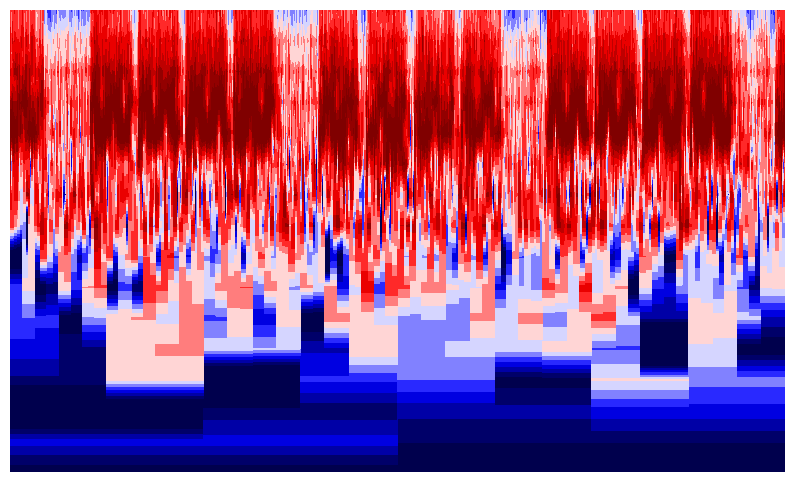

In [ ]:
# Generation scalogram of DWT
dir_path = '/content/6dB/slider/id_00'
amp_cof=8
# db1 is wavelet for DWT
waveletname = 'db1'
level = 16
# parameters for re-contructing array from coefficents of DWT
time = np.arange(0, 2**level)
size = 2**level
t_arr = np.zeros((level, size))
frequencies = np.zeros(level)
sampling_rate = 16e3
fre = level-1
# calculate frequency of each level
for i in range(1, level+1):
  frequencies[fre]=sampling_rate/2**i
  fre = fre-1
yticks = np.log2(frequencies)

cmap = plt.cm.seismic
contourlevels = np.arange(-6,7)
types = 'normal abnormal'.split()
for g in types:
  pathlib.Path(f'{dir_path}/ScDWT_6dBSlider00/{g}').mkdir(parents=True, exist_ok=True)
  for filename in os.listdir(f'{dir_path}/{g}'):
      plt.clf()
      sound = f'{dir_path}/{g}/{filename}'
      y, sr = librosa.load(sound, sr=None, mono=True, duration=10)
      y = amp_cof*y/max(abs(y)) #standardize sound
      # cut-off the signal to get 2**n samples required by DWT
      y=y[0:2**(level+1)-1]
      coeffs = wavedec(y, waveletname, level=level)

      # re-constructing array by duplication of coefficents
      for Idx in range(0, level):
        arr = coeffs[Idx]
        r = size/len(arr)
        repeat_arr = np.repeat(arr, r, axis=0)
        t_arr[Idx]=repeat_arr

      power = (abs(t_arr)) ** 2
      fig, ax = plt.subplots(figsize=(10, 6))
      im = ax.contourf(time, yticks, np.log2(power), contourlevels, extend='both',cmap=cmap)
      plt.axis('off')
      # below break command used for generation of a single file
      # comment it to generate entire dataset
      break
      plt.savefig(f'{dir_path}/ScDWT_6dBSlider00/{g}/{filename[:-3].replace(".", "")}.png', bbox_inches='tight')
      plt.close()

In [ ]:
import shutil

In [ ]:
src_path = '/content/drive/MyDrive/MIMII_data/6dB/slider/id_00/Sc_6dBSlider00_128_amp_8_15_10'
dst_path = '/content/6dB/slider/id_00/Sc_6dBSlider00_128_amp_8_15_10'
shutil.copytree(src_path, dst_path)
print('Copied')

Copied


In [ ]:
import tensorflow as tf
import keras

In [ ]:
# Training and validation for acoustic recognition task
batch_size = 64
img_height = 512
img_width = 512
data_dir = '/content/6dB/slider/id_00/Sc_6dBSlider00_128_amp_8_15_10'

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels = "inferred",
    label_mode = 'categorical',
    class_names = ('normal', 'abnormal'),
    color_mode = "rgb",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels = "inferred",
    label_mode = 'categorical',
    class_names = ('normal', 'abnormal'),
    color_mode = "rgb",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

num_classes = 2

metrics = [
           'accuracy',
           tf.keras.metrics.AUC(
              num_thresholds=200, curve='ROC',
              summation_method='interpolation', name='AUC_ROC', dtype=None,
              thresholds=None, multi_label=False,
              num_labels=None,
              label_weights=None,
              from_logits=False),
           tf.keras.metrics.Precision(
              thresholds=None, top_k=None,
              class_id=None, name=None, dtype=None),
           tf.keras.metrics.Recall(
              thresholds=None, top_k=None, class_id=None,
              name=None, dtype=None)
]

model = tf.keras.Sequential([
      tf.keras.layers.Rescaling(1./255),
      tf.keras.layers.Conv2D(16, 3, activation='relu', use_bias=True, bias_initializer='zeros'),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Conv2D(32, 3, activation='relu', use_bias=True, bias_initializer='zeros'),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Conv2D(64, 3, activation='relu', use_bias=True, bias_initializer='zeros'),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(0.25),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dropout(0.25),
      tf.keras.layers.Dense(units=num_classes, activation='softmax')
    ])
opt = tf.keras.optimizers.Adam(learning_rate=0.001,name='Adam')
model.compile(
  optimizer=opt,
  loss=tf.keras.losses.CategoricalCrossentropy(),
  metrics=metrics)

checkpoint_filepath = '/content/Sc_6dBSlider00_128_amp_8_15_10_model_auc.keras'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor = 'val_AUC_ROC',
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode='max',
    save_freq='epoch')

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=32,
    callbacks=[model_checkpoint_callback])